# ML Assignment

Problem Statement :
Using Deep Learning techniques, predict the coordinates (x,y) of a pixel which has a value of
255 for 1 pixel in a given 50x50 pixel grayscale image and all other pixels are 0. The pixel with a
value of 255 is randomly assigned. You may generate a dataset as required for solving the
problem. Please explain your rationale behind dataset choices.

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

### Dataset Rationale

Since only one pixel is active, synthetic dataset generation is ideal.
Random pixel placement ensures uniform learning across image space.

Images are normalized for stable training and coordinates are scaled
between 0 and 1 for regression compatibility.

This ensures the regression model learns pixel position uniformly
across the full image without dataset bias.


In [2]:
# Dataset Generation
IMG_SIZE = 50
DATASET_SIZE = 20000


def generate_dataset(n_samples):
    images = []
    coords = []

    for _ in range(n_samples):
        img = np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.float32)

        x = np.random.randint(0, IMG_SIZE)
        y = np.random.randint(0, IMG_SIZE)

        img[x, y] = 255.0

        # Normalize image
        img /= 255.0

        images.append(img)

        # Normalize coordinates between 0 and 1
        coords.append([x / IMG_SIZE, y / IMG_SIZE])

    images = np.array(images)
    coords = np.array(coords)

    return images, coords


X, y = generate_dataset(DATASET_SIZE)

print("Dataset shape:", X.shape, y.shape)

Dataset shape: (20000, 50, 50) (20000, 2)


In [3]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [4]:
# CNN Model Architecture
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    layers.MaxPooling2D(),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='sigmoid')  # x,y outputs
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       663,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687,234 (2.62 MB)

 Trainable params: 687,234 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#Model Training
history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64
)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 122ms/step - loss: 0.0225 - mae: 0.0948 - val_loss: 5.3567e-04 - val_mae: 0.0172
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - loss: 4.0948e-04 - mae: 0.0145 - val_loss: 2.5400e-04 - val_mae: 0.0118
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 42s 102ms/step - loss: 2.4716e-04 - mae: 0.0112 - val_loss: 2.0336e-04 - val_mae: 0.0104
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - loss: 1.9383e-04 - mae: 0.0100 - val_loss: 1.5972e-04 - val_mae: 0.0092
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - loss: 1.4291e-04 - mae: 0.0083 - val_loss: 1.3963e-04 - val_mae: 0.0087
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - loss: 1.2175e-04 - mae: 0.0078 - val_loss: 8.8827e-05 - val_mae: 0.0063
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - loss: 8.9779e-05 - mae: 0.0066 - val_loss: 8.5035e-05 - val_mae: 0.0067
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - loss: 7.2703e-05 - mae: 0.0060 - val_loss: 7.48

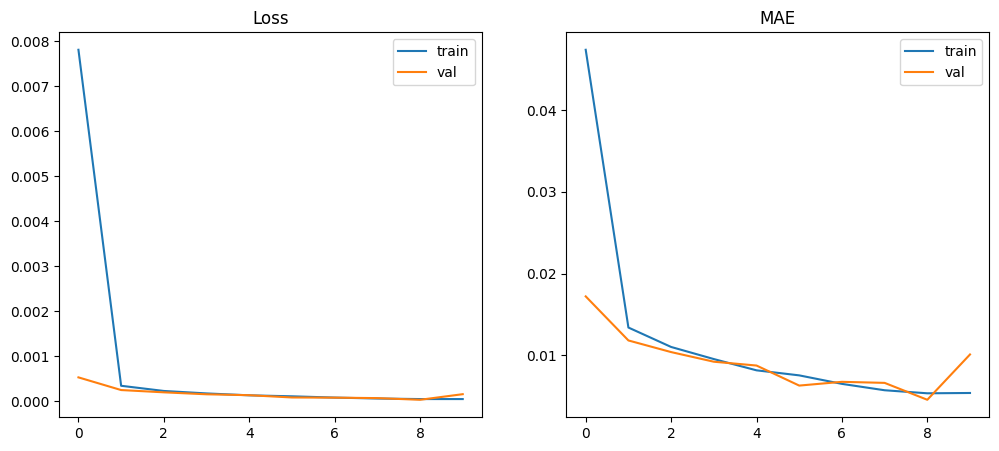

In [6]:
#Plot Training Graphs
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val')
plt.title("MAE")
plt.legend()

plt.show()

In [7]:
#Evaluation
loss, mae = model.evaluate(X_test, y_test)
print("Test MAE:", mae)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.6504e-04 - mae: 0.0102
Test MAE: 0.010338910855352879


In [8]:
#Pixel Distance Error Evaluation

preds = model.predict(X_test)

pixel_errors = np.sqrt(
    ((preds[:, 0] - y_test[:, 0]) ** 2 +
     (preds[:, 1] - y_test[:, 1]) ** 2)
) * IMG_SIZE

print("Average Pixel Error:", np.mean(pixel_errors))
print("Max Pixel Error:", np.max(pixel_errors))
print("Min Pixel Error:", np.min(pixel_errors))

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Average Pixel Error: 0.8213172568799756
Max Pixel Error: 2.998461599749936
Min Pixel Error: 0.0010793569568051057


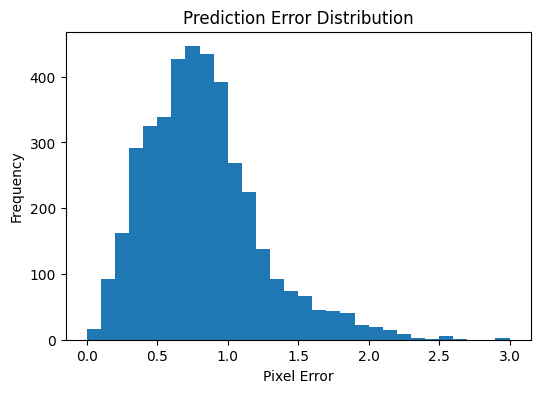

In [9]:
# Error Distribution Plot

plt.figure(figsize=(6,4))
plt.hist(pixel_errors, bins=30)
plt.title("Prediction Error Distribution")
plt.xlabel("Pixel Error")
plt.ylabel("Frequency")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


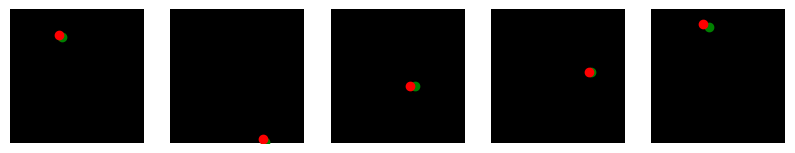

In [10]:
# Predictions Visualization
def show_predictions(model, X, y, n=5):
    preds = model.predict(X[:n])

    plt.figure(figsize=(10,4))

    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.imshow(X[i].squeeze(), cmap='gray')

        true_x = int(y[i][0] * IMG_SIZE)
        true_y = int(y[i][1] * IMG_SIZE)

        pred_x = int(preds[i][0] * IMG_SIZE)
        pred_y = int(preds[i][1] * IMG_SIZE)

        plt.scatter(true_y, true_x, c='green', label='True')
        plt.scatter(pred_y, pred_x, c='red', label='Pred')

        plt.axis('off')

    plt.show()


show_predictions(model, X_test, y_test)